### Импорт данных

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

plt.style.use('seaborn-v0_8-whitegrid')

try:
    data = pd.read_csv('data/data2.csv', sep=';', names=['discount', 'profit'])
    print("Данные успешно загружены. Количество строк:", len(data))
    display(data.head())
except FileNotFoundError:
    print("Ошибка: файл 'data/data2.csv' не найден. Убедитесь, что он находится в правильной папке.")
    data = pd.DataFrame() 

x = data['discount'].values
y = data['profit'].values

Данные успешно загружены. Количество строк: 26


,discount,profit
0,0.0,-7.697966
1,0.2,-6.572665
2,0.4,-5.370468
3,0.6,-3.158585
4,0.8,-1.482707


### СЛУ для полинома 2й степени

In [12]:
n = len(x)
idx_quad = [0, n // 2, n - 1]
x_points_quad = x[idx_quad]
y_points_quad = y[idx_quad]

print(f"Выбранные точки для полинома 2-й степени (индексы {idx_quad}):")
for i in range(3):
    print(f"  x={x_points_quad[i]}, y={y_points_quad[i]}")

A_quad = np.vstack([x_points_quad**2, x_points_quad, np.ones(3)]).T
b_quad = y_points_quad

try:
    coeffs_quad = solve(A_quad, b_quad)
    a2, a1, a0 = coeffs_quad
    print(f"\nРешение СЛУ (коэфф-ы): a2={a2:.4f}, a1={a1:.4f}, a0={a0:.4f}")
except np.linalg.LinAlgError:
    print("\nОшибка: не удалось решить СЛУ.")
    coeffs_quad = np.array([0,0,0])

Выбранные точки для полинома 2-й степени (индексы [0, 13, 25]):
  x=0.0, y=-7.697965818
  x=2.6, y=17.26743396
  x=5.0, y=25.23920411

Решение СЛУ (коэфф-ы): a2=-1.2561, a1=12.8679, a0=-7.6980


### Квадратичное отклонение для полинома 2й степений

In [13]:
def poly_2_func(x, coeffs):
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]


y_pred_quad = poly_2_func(x, coeffs_quad)
rss_quad = np.sum((y - y_pred_quad)**2)

print(f"Квадратичное отклонение для полинома 2-й степени: {rss_quad:.4f}")

Квадратичное отклонение для полинома 2-й степени: 163.3635


### СЛУ для полинома 3й степени

In [14]:
idx_cubic = np.linspace(0, n - 1, 4, dtype=int)
x_points_cubic = x[idx_cubic]
y_points_cubic = y[idx_cubic]

print(f"Выбранные точки для полинома 3-й степени (индексы {idx_cubic}):")
for i in range(4):
    print(f"  x={x_points_cubic[i]}, y={y_points_cubic[i]}")

A_cubic = np.vstack([x_points_cubic**3, x_points_cubic**2, x_points_cubic, np.ones(4)]).T
b_cubic = y_points_cubic

try:
    coeffs_cubic = solve(A_cubic, b_cubic)
    a3, a2, a1, a0 = coeffs_cubic
    print(f"\nРешение СЛУ (коэфф-ы): a3={a3:.4f}, a2={a2:.4f}, a1={a1:.4f}, a0={a0:.4f}")
except np.linalg.LinAlgError:
    print("\nОшибка: не удалось решить СЛУ.")
    coeffs_cubic = np.array([0,0,0,0])

Выбранные точки для полинома 3-й степени (индексы [ 0  8 16 25]):
  x=0.0, y=-7.697965818
  x=1.6, y=6.327902394
  x=3.2, y=23.04006768
  x=5.0, y=25.23920411

Решение СЛУ (коэфф-ы): a3=-0.6475, a2=3.6326, a1=4.6116, a0=-7.6980


### Квадратичное отклонение для полинома 3й степени

In [15]:
def poly_3_func(x, coeffs):
    return coeffs[0] * x**3 + coeffs[1] * x**2 + coeffs[2] * x + coeffs[3]


y_pred_cubic = poly_3_func(x, coeffs_cubic)
rss_cubic = np.sum((y - y_pred_cubic)**2)

print(f"Квадратичное отклонение для полинома 3-й степени: {rss_cubic:.4f}")

Квадратичное отклонение для полинома 3-й степени: 3.3534


### СЛУ для полинома 4й степени

In [16]:
idx_quartic = np.linspace(0, n - 1, 5, dtype=int)
x_points_quartic = x[idx_quartic]
y_points_quartic = y[idx_quartic]

print(f"Выбранные точки для полинома 4-й степени (индексы {idx_quartic}):")
for i in range(5):
    print(f"  x={x_points_quartic[i]}, y={y_points_quartic[i]}")

A_quartic = np.vstack([x_points_quartic**4, x_points_quartic**3, x_points_quartic**2, x_points_quartic, np.ones(5)]).T
b_quartic = y_points_quartic

try:
    coeffs_quartic = solve(A_quartic, b_quartic)
    a4, a3, a2, a1, a0 = coeffs_quartic
    print(f"\nРешение СЛУ (коэфф-ы): a4={a4:.4f}, a3={a3:.4f}, a2={a2:.4f}, a1={a1:.4f}, a0={a0:.4f}")
except np.linalg.LinAlgError:
    print("\nОшибка: не удалось решить СЛУ.")
    coeffs_quartic = np.array([0,0,0,0,0])

Выбранные точки для полинома 4-й степени (индексы [ 0  6 12 18 25]):
  x=0.0, y=-7.697965818
  x=1.2, y=2.403896227
  x=2.4, y=15.47213024
  x=3.6, y=25.32216894
  x=5.0, y=25.23920411

Решение СЛУ (коэфф-ы): a4=0.0108, a3=-0.6739, a2=3.3477, a1=5.3528, a0=-7.6980


### Квадратичное отклонение для полинома 4й степени

In [17]:
def poly_4_func(x, coeffs):
    return coeffs[0] * x**4 + coeffs[1] * x**3 + coeffs[2] * x**2 + coeffs[3] * x + coeffs[4]


y_pred_quartic = poly_4_func(x, coeffs_quartic)
rss_quartic = np.sum((y - y_pred_quartic)**2)

print(f"Квадратичное отклонение для полинома 4-й степени: {rss_quartic:.4f}")

Квадратичное отклонение для полинома 4-й степени: 2.1055


### Графики по заданным в файле точкам и полученным векторам (для полиномов 2й, 3й и 4й степени)

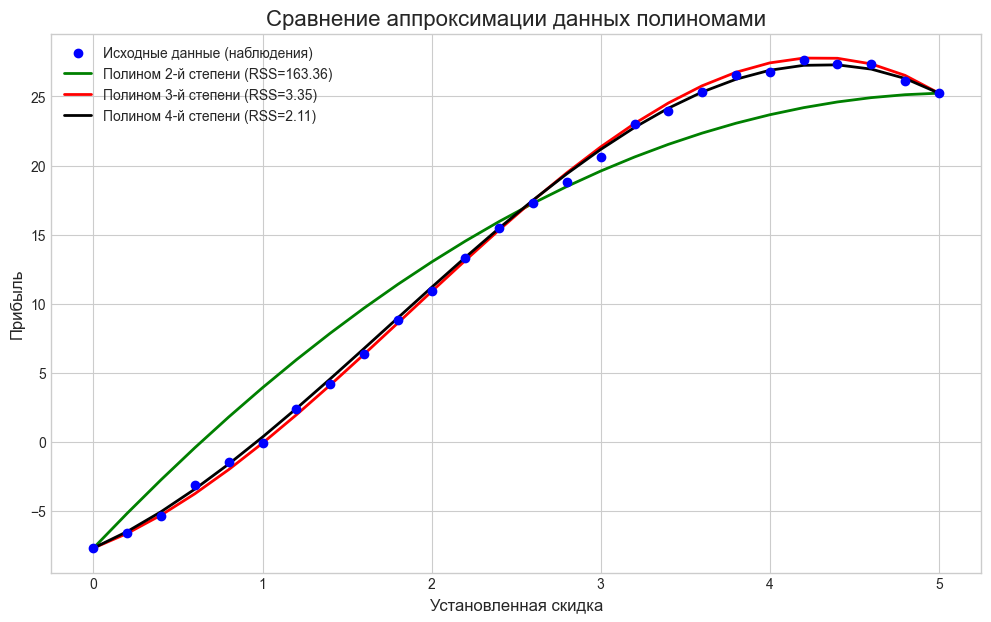

In [21]:
plt.figure(figsize=(12, 7))

plt.scatter(x, y, label='Исходные данные (наблюдения)', color='blue', zorder=5)

plt.plot(x, y_pred_quad, label=f'Полином 2-й степени (RSS={rss_quad:.2f})', color='green', linewidth=2)
plt.plot(x, y_pred_cubic, label=f'Полином 3-й степени (RSS={rss_cubic:.2f})', color='red', linewidth=2)
plt.plot(x, y_pred_quartic, label=f'Полином 4-й степени (RSS={rss_quartic:.2f})', color='black', linewidth=2)

plt.title('Сравнение аппроксимации данных полиномами', fontsize=16)
plt.xlabel('Установленная скидка', fontsize=12)
plt.ylabel('Прибыль', fontsize=12)

plt.legend()
plt.show()

### Выбор варианта с наименьшим отклонением

In [ ]:
print("Выбор лучшего варианта")

rss_values = {
    'Полином 2-й степени': (rss_quad, poly_2_func, coeffs_quad),
    'Полином 3-й степени': (rss_cubic, poly_3_func, coeffs_cubic),
    'Полином 4-й степени': (rss_quartic, poly_4_func, coeffs_quartic)
}

best_model_name = min(rss_values, key=lambda k: rss_values[k][0])
best_rss, best_model_func, best_coeffs = rss_values[best_model_name]

print(f"Модель с наименьшим RSS: {best_model_name} (RSS={best_rss:.4f})")
print(f"\nСравнение всех моделей:")
for name, (rss, _, _) in rss_values.items():
    print(f"  {name}: RSS={rss:.4f}")

print(f"\nПрогноз прибыли по лучшей модели ({best_model_name}):")

discount_to_predict = np.array([6, 8])
predicted_profit = best_model_func(discount_to_predict, best_coeffs)

print(f"При скидке 6% ожидаемая прибыль составит {predicted_profit[0]:.4f}")
print(f"При скидке 8% ожидаемая прибыль составит {predicted_profit[1]:.4f}")

Выбор лучшего варианта
Модель с наименьшим RSS: Полином 4-й степени (RSS=2.1055)

Сравнение всех моделей:
  Полином 2-й степени: RSS=163.3635
  Полином 3-й степени: RSS=3.3534
  Полином 4-й степени: RSS=2.1055

Прогноз прибыли по лучшей модели (Полином 4-й степени):
При скидке 6% ожидаемая прибыль составит 13.3049
При скидке 8% ожидаемая прибыль составит -51.6276
